In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb



In [3]:
df = pd.read_csv("Covid Data.csv")  #loading the data set
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [4]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [5]:
"""

 if the boolean value is 1 it - yes , if it is 2 - no ,if it is 99 or 97 is a missing data

 classification_final : 1-3 diagnosed due to covid in degrees, above 4 results are uncertian

 patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.

 date_died : If the patient died, this field shows the actual date of death (format: YYYY-MM-DD) ,if its in the format (9999-99-99) the person is still alive 

 usmr: Indicates whether the patient treated medical units of the first, second or third level.


 """

'\n\n if the boolean value is 1 it - yes , if it is 2 - no ,if it is 99 or 97 is a missing data\n\n classification_final : 1-3 diagnosed due to covid in degrees, above 4 results are uncertian\n\n patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.\n\n date_died : If the patient died, this field shows the actual date of death (format: YYYY-MM-DD) ,if its in the format (9999-99-99) the person is still alive \n\n usmr: Indicates whether the patient treated medical units of the first, second or third level.\n\n\n '

In [6]:
""" data cleaning """

df = df[~df.isin([99,97,98]).any(axis=1)]   # cleaning the data set by removing the missing details
df = df[df["CLASIFFICATION_FINAL"]<4]    # dropping the uncertain datas
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2
16,2,1,1,2,9999-99-99,2,1,80,2,2,...,2,2,1,2,2,2,2,2,3,1
162,1,2,1,2,9999-99-99,2,1,10,2,2,...,2,2,2,1,1,2,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047902,1,13,1,2,9999-99-99,2,2,38,2,2,...,2,2,2,2,2,2,2,2,3,2
1047903,1,13,1,2,9999-99-99,2,1,60,2,2,...,2,2,2,2,2,2,2,2,3,2
1047905,1,13,1,2,9999-99-99,2,2,53,2,1,...,2,2,1,2,2,2,2,2,3,2
1047928,1,13,1,2,9999-99-99,2,2,47,2,1,...,2,2,2,2,2,2,2,2,3,2


In [7]:
df["Alive or not"] = df["DATE_DIED"].apply(lambda x: "Alive" if x == '9999-99-99' else "Dead")
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Alive or not
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,3,2,Alive
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,1,2,2,1,2,2,3,2,Alive
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,3,2,Alive
16,2,1,1,2,9999-99-99,2,1,80,2,2,...,2,1,2,2,2,2,2,3,1,Alive
162,1,2,1,2,9999-99-99,2,1,10,2,2,...,2,2,1,1,2,2,2,3,2,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047902,1,13,1,2,9999-99-99,2,2,38,2,2,...,2,2,2,2,2,2,2,3,2,Alive
1047903,1,13,1,2,9999-99-99,2,1,60,2,2,...,2,2,2,2,2,2,2,3,2,Alive
1047905,1,13,1,2,9999-99-99,2,2,53,2,1,...,2,1,2,2,2,2,2,3,2,Alive
1047928,1,13,1,2,9999-99-99,2,2,47,2,1,...,2,2,2,2,2,2,2,3,2,Alive


In [8]:
alive_graph = df.groupby(["USMER","Alive or not"]).size().reset_index(name="count")
alive_graph
#sb.lineplot(data = df , x= (["USMER"]==1),y = (["USMER"]==2),hue = "Alive or not")

,USMER,Alive or not,count
0,1,Alive,13007
1,1,Dead,9915
2,2,Alive,11709
3,2,Dead,6663


<function matplotlib.pyplot.show(close=None, block=None)>

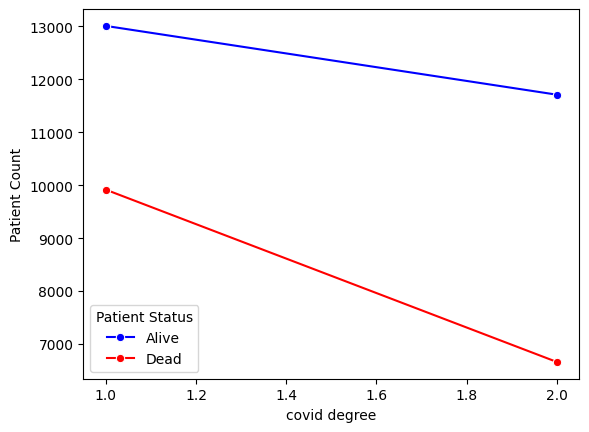

In [9]:
sb.lineplot(x="USMER",y = "count",data = alive_graph,hue="Alive or not",palette={"Alive":"blue","Dead":"Red"},
            marker="o")
plt.xlabel ("covid degree")
plt.ylabel("Patient Count")

# Custom legend labels
#new_labels = ["Blue – Recovered/Discharged", "Red – Fatal Outcome or dead"]
plt.legend(title="Patient Status")
plt.show

In [10]:
""" 
1.Who has the highest death rate based on the level of care (USMER) the patient was admitted to?
ans.Although the number of patients admitted to first- and second-level medical units is quite similar, patients treated at first-level units experienced the highest death rate."""


' \n1.Who has the highest death rate based on the level of care (USMER) the patient was admitted to?\nans.Although the number of patients admitted to first- and second-level medical units is quite similar, patients treated at first-level units experienced the highest death rate.'

<Axes: >

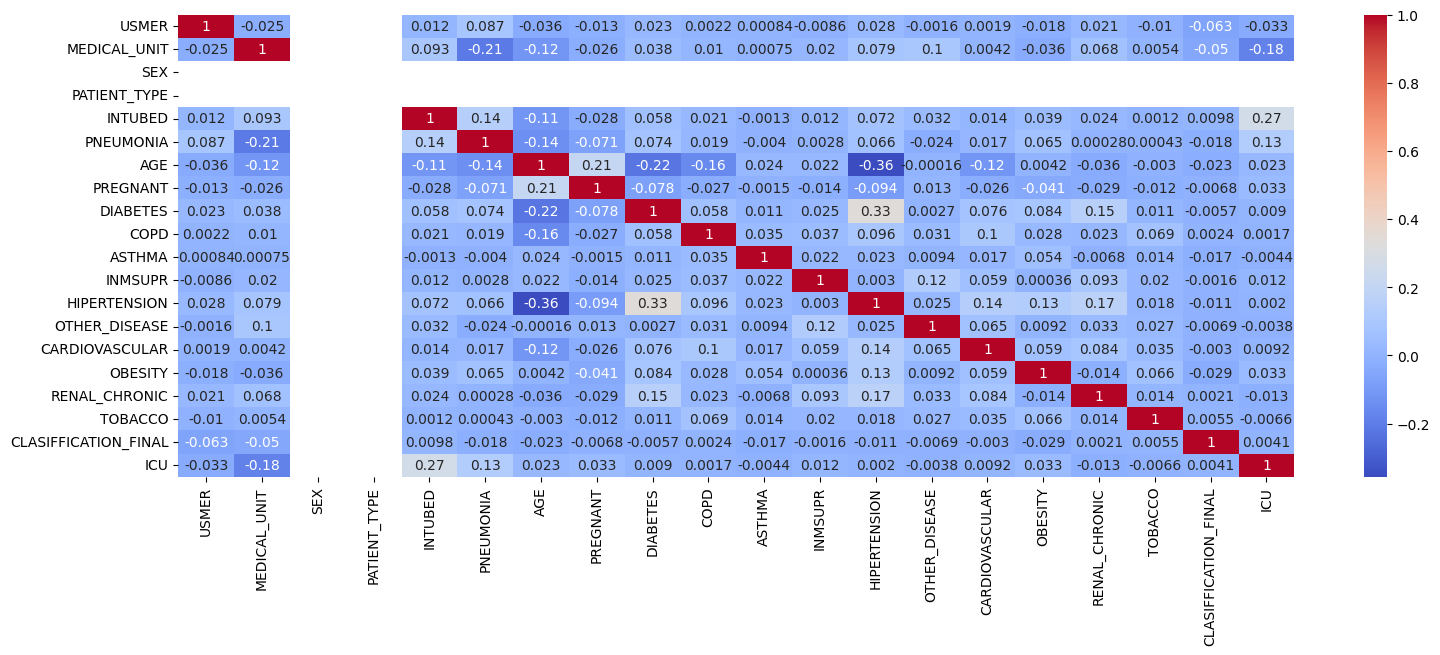

In [11]:
plt.figure(figsize=(18,6))
corr = df.select_dtypes(include=['number']).corr()
sb.heatmap(corr, annot=True, cmap="coolwarm")

In [12]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Alive or not
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,3,2,Alive
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,1,2,2,1,2,2,3,2,Alive
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,3,2,Alive
16,2,1,1,2,9999-99-99,2,1,80,2,2,...,2,1,2,2,2,2,2,3,1,Alive
162,1,2,1,2,9999-99-99,2,1,10,2,2,...,2,2,1,1,2,2,2,3,2,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047902,1,13,1,2,9999-99-99,2,2,38,2,2,...,2,2,2,2,2,2,2,3,2,Alive
1047903,1,13,1,2,9999-99-99,2,1,60,2,2,...,2,2,2,2,2,2,2,3,2,Alive
1047905,1,13,1,2,9999-99-99,2,2,53,2,1,...,2,1,2,2,2,2,2,3,2,Alive
1047928,1,13,1,2,9999-99-99,2,2,47,2,1,...,2,2,2,2,2,2,2,3,2,Alive


In [13]:


da = df.groupby(["DIABETES","ASTHMA"]).size().reset_index(name = "count1")
da

,DIABETES,ASTHMA,count1
0,1,1,511
1,1,2,13931
2,2,1,840
3,2,2,26012


<Axes: xlabel='DIABETES', ylabel='count1'>

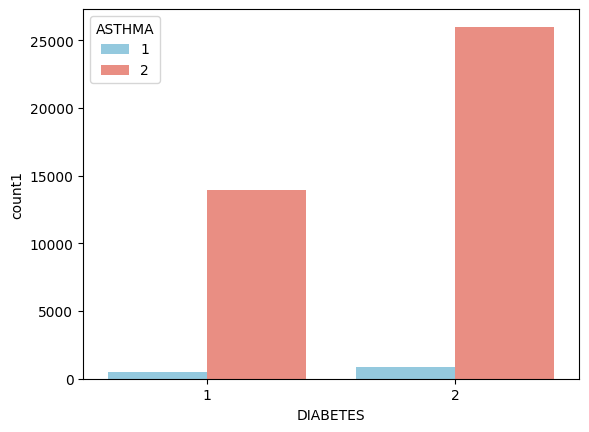

In [14]:
sb.barplot(
    data=da,
    x="DIABETES",
    y="count1",
    hue="ASTHMA",
    palette={1: "skyblue", 2: "salmon"}
)


In [15]:
al = df[(df["DIABETES"]==1)&(df["ASTHMA"]==1)]
al1 = al.groupby(["DIABETES","ASTHMA","Alive or not"]).size().reset_index(name="count1")
al1


,DIABETES,ASTHMA,Alive or not,count1
0,1,1,Alive,278
1,1,1,Dead,233


<Axes: xlabel='DIABETES', ylabel='count1'>

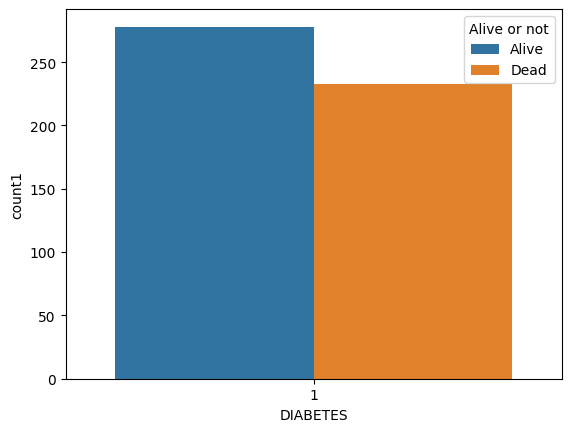

In [16]:
sb.barplot(y="count1",x="DIABETES",hue="Alive or not",data = al1)

In [17]:
#percentage of diagnosed person who were admitted had diabetties or astma and how many of them are alive or dead?
#ans.approximately more than halfof them survived and others were dead


In [18]:
df


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Alive or not
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,3,2,Alive
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,1,2,2,1,2,2,3,2,Alive
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,3,2,Alive
16,2,1,1,2,9999-99-99,2,1,80,2,2,...,2,1,2,2,2,2,2,3,1,Alive
162,1,2,1,2,9999-99-99,2,1,10,2,2,...,2,2,1,1,2,2,2,3,2,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047902,1,13,1,2,9999-99-99,2,2,38,2,2,...,2,2,2,2,2,2,2,3,2,Alive
1047903,1,13,1,2,9999-99-99,2,1,60,2,2,...,2,2,2,2,2,2,2,3,2,Alive
1047905,1,13,1,2,9999-99-99,2,2,53,2,1,...,2,1,2,2,2,2,2,3,2,Alive
1047928,1,13,1,2,9999-99-99,2,2,47,2,1,...,2,2,2,2,2,2,2,3,2,Alive


In [19]:
icu = df.groupby(["ICU","Alive or not"]).size().reset_index(name="count")
icu


,ICU,Alive or not,count
0,1,Alive,1657
1,1,Dead,1859
2,2,Alive,23059
3,2,Dead,14719


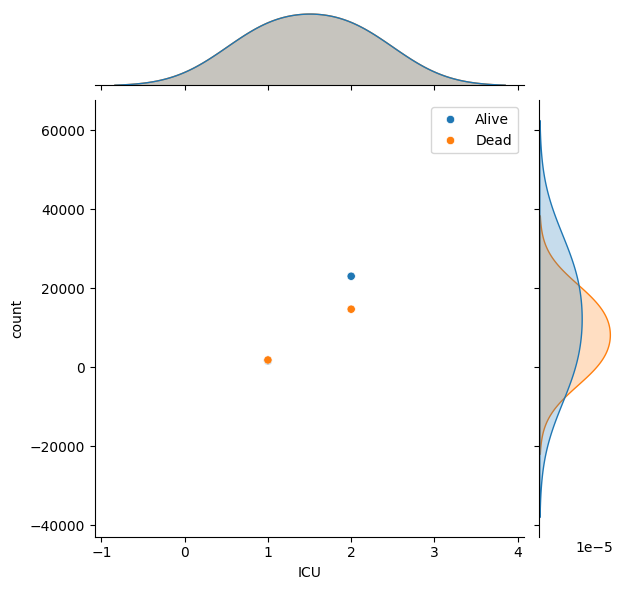

In [20]:
sb.jointplot(x="ICU",y="count",data = icu,hue="Alive or not")
plt.legend()   # 1 means they are admitted in icu and 2 means no
plt.show()

In [21]:
"""
3.the number of patients who were admitted into icu and how much percent is alive?
ans.only a small percentage was admitted into icu but 50 percent of them didnt survived

"""

'\n3.the number of patients who were admitted into icu and how much percent is alive?\nans.only a small percentage was admitted into icu but 50 percent of them didnt survived\n\n'

In [22]:
icu1 = df.groupby(["ICU","INTUBED"]).size().reset_index(name="count")
icu1

,ICU,INTUBED,count
0,1,1,1901
1,1,2,1615
2,2,1,6160
3,2,2,31618


In [27]:

diseases = [
    "PNEUMONIA", "DIABETES", "COPD", "ASTHMA", "INMSUPR",
    "HIPERTENSION", "OTHER_DISEASE", "CARDIOVASCULAR",
    "OBESITY", "RENAL_CHRONIC", "TOBACCO"
]

dead_df = df[df["Alive or not"] == "Dead"]

disease_summary = (
    dead_df[diseases]
    .apply(lambda x: (x == 1).sum())
    .reset_index()
)

print(disease_summary)

             index      0
0        PNEUMONIA  12799
1         DIABETES   7248
2             COPD    978
3           ASTHMA    490
4          INMSUPR    549
5     HIPERTENSION   8423
6    OTHER_DISEASE   1006
7   CARDIOVASCULAR    932
8          OBESITY   4686
9    RENAL_CHRONIC   1260
10         TOBACCO    625


<Axes: xlabel='Disease', ylabel='Count'>

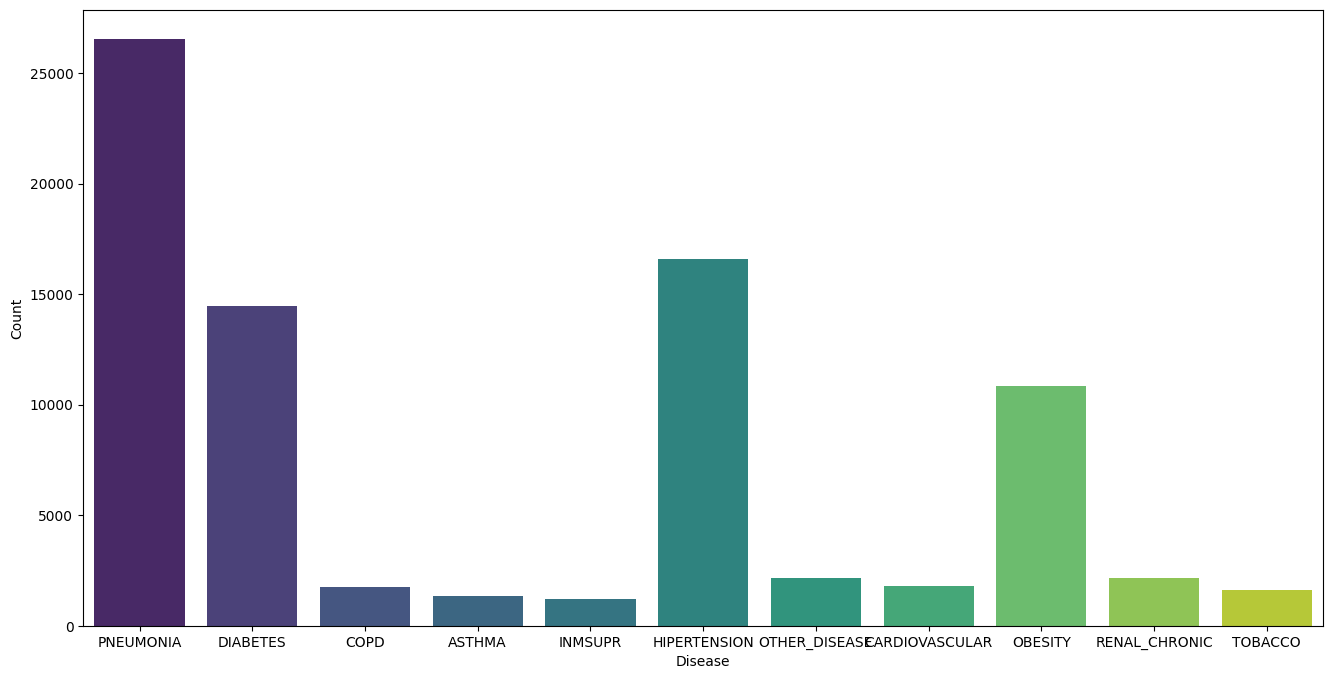

In [ ]:
plt.figure(figsize=(16,8))
sb.barplot(
    data=disease_summary,
    x="Disease",
    y="Count",
    hue="Disease",
    palette="viridis"
)


In [ ]:
"""Q4. Which underlying disease is most strongly associated with a higher death rate among COVID-19 patients?

Ans. The analysis shows that patients with pneumonia had the highest death rate, indicating that this condition was the most significant factor contributing to fatal outcomes."""

In [28]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Alive or not
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,3,2,Alive
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,1,2,2,1,2,2,3,2,Alive
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,3,2,Alive
16,2,1,1,2,9999-99-99,2,1,80,2,2,...,2,1,2,2,2,2,2,3,1,Alive
162,1,2,1,2,9999-99-99,2,1,10,2,2,...,2,2,1,1,2,2,2,3,2,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047902,1,13,1,2,9999-99-99,2,2,38,2,2,...,2,2,2,2,2,2,2,3,2,Alive
1047903,1,13,1,2,9999-99-99,2,1,60,2,2,...,2,2,2,2,2,2,2,3,2,Alive
1047905,1,13,1,2,9999-99-99,2,2,53,2,1,...,2,1,2,2,2,2,2,3,2,Alive
1047928,1,13,1,2,9999-99-99,2,2,47,2,1,...,2,2,2,2,2,2,2,3,2,Alive


In [35]:
age = df.groupby("AGE").size().reset_index(name ="counttt")
age

,AGE,counttt
0,0,227
1,1,66
2,2,29
3,3,20
4,4,23
...,...,...
96,96,18
97,100,6
98,101,4
99,103,1


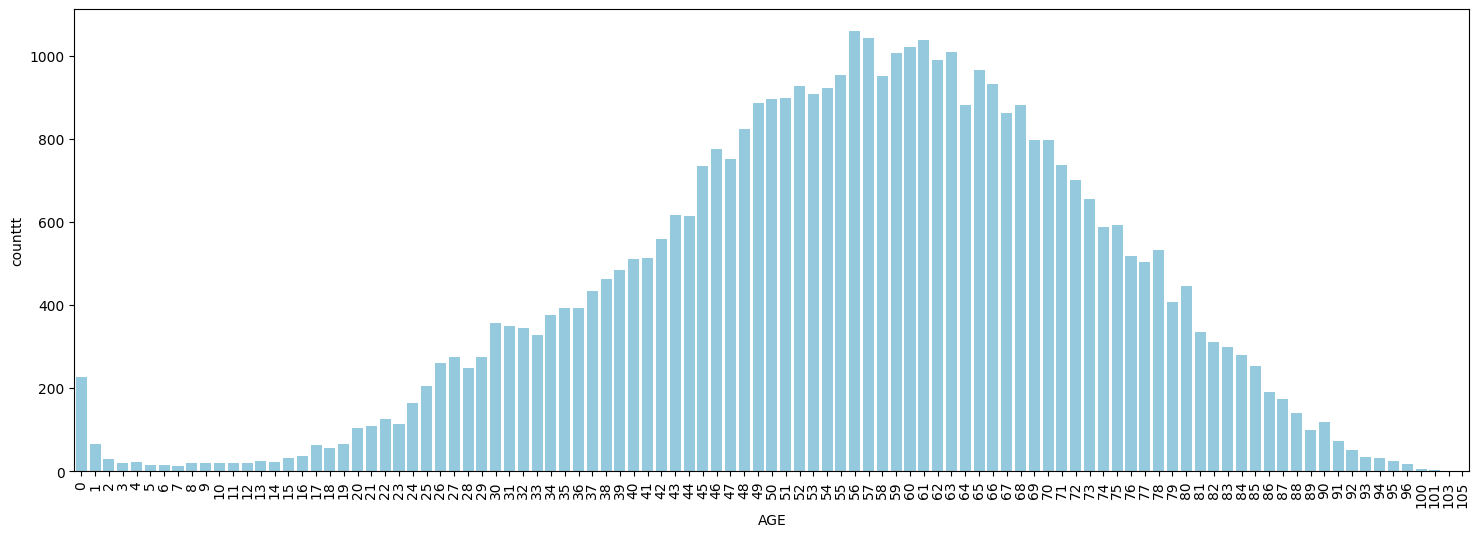

In [44]:
plt.figure(figsize=(18,6))
sb.barplot(x="AGE", y="counttt", data=age, color="skyblue")
plt.xticks(rotation = 90)
plt.show()


In [ ]:
#5. Which age group was most affected by COVID-19?
#A: The data shows that individuals aged 55 to 65 years were the most affected by COVID-19, having the highest number of recorded cases in this age category.